# INFO 2950 Project - Final Report 
Net IDs: tjk223, bsp73, amm643, swp42

Names: Teddy Klausner, Ben Polson, Sasha Miranda, Spencer Pettee
### Details
This file is the final report section of our final project. There are multiple sections in the notebook and they will be organized in the following format: **Introduction, Data Description, Preregistration Statement, Data Analysis, Evaluation of Signifigance, Interpretation and Conclusion, Limitations, Souce Code, and Acknowledgements.** In addition to this file we also have two appendicies. The first appendix shows our cleaning and merging of the data files. The second appedix shows other work that is not shown in this file. 

#### Github Repo: https://github.com/tklausner/info2950-project

## Introduction
What is the context of the work? What research question are you trying to answer? What are your main findings? Include a brief summary of your results.

In this project we wanted to work with multiple data sets, so we decided explore food expenditure and internet data. The first step was to clean both data files. After both files were clean and ready to work with we merged them based on country. Another goal was discovering how factors impact internet quality by country. To do this we built a multiple regression model which told us that some of the most important factors on internet quality are. 

In analysis one, we analyze the relationship between food expenditure and each of the columns in the internet dataset that we kept after cleaning. We hypothesize that some of these columns may have a relationship with food expenditure, and we would like to find out which ones do. We will conclude by using p-values and confidence intervals to examine whether these relationships are statistically significant.

We used the clean data and found the correlation of all of the variables. We then visualized the correlations using a heatmap 

note: we aren't doing GDP and food expenditure in analysis 1 
also address the fu confidence interval 
[I can finish this later]-sasha 

## Data Description

**What are the observations (rows) and the attributes (columns)?**

We are using data about internet usage internationally and a separate dataset containing GDP and food expenditure internationally. We combined the two datasets into one where rows are countries and columns of interest from the internet dataset are gender gap in internet access, urban electricity access, rural electricity access, smartphone cost, level of web accessibility, trust in online privacy, total electricity access, internet users. The columns of interest from the other dataset are GDP, and food expenditure.

**Why was this dataset created?**

The internet data set was created to measure four categories of “The Inclusive Internet Index,” which tracks internet services in countries across the world. The four categories are affordability, availability, relevance and readiness. The index is meant for advocacy organizations, local governments and journalists. 

This dataset was created by Our World in Data, which wanted to look at the relationship between GDP per person and food expenditure per person. The data was originally sourced from the World Bank, whose goal is to help countries solve issues. They record many general statistics for nearly every country.

**Who funded the creation of the dataset?**

The internet service dataset was funded by Facebook. The data seems to be funded to support Facebook's internet.org whose mission is to bring internet access to those who do not have it. 

The World Bank funded the creation of the second dataset, and they receive funding from returns on their investments, country membership fees, and donations made by members

**What processes might have influenced what data was observed and recorded and what was not?**

The idea of finding how connected people are is more than just taking a survey of <5,000 people. This information may not be representative of the true experience people have in their country. Lastly there is the issue of having a device that connects to the internet. People may be able to afford internet access, but cannot afford the initial price of buying a device. Although the survey apparently covers 91% of the population, can we be sure of that number? 

For the GDP and food expenditure per person, they are calculated by dividing total GDP and food expenditure by population. The World Bank sources this data from other organizations that are more specific to countries or groups of countries, such as the U.S. Census Bureau. What data was recorded and what wasn’t is determined by how well these organizations sampled and surveyed the population, and also how well the population responded to these surveys.

**What preprocessing was done, and how did the data come to be in the form that you are using?**

The data appears to be compiled into a single file with many different columns that measure a variety of metrics about internet service. If the data was from surveys was then compiled into countries. The data also combines some of information into categories like regions (such as North America and others). 

Similarly to the internet data, the food/GDP data was taken from survey within each country. This data was taken from these countries by the World Bank and they compiled all of it into one table.

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

Yes the data was collected through a survey which asked 4,953 participants from 99 countries across Asia-Pacific, the Americas, Europe, the Middle East, North Africa and Sub-Saharan Africa. Considering they took a survey they likely knew the data was being collected. The source is unclear about what the participants thought the data was for. 

People were certainly aware of this data collection, and the purpose that the participants expected the data to be used for was not specified online. We would guess that they expect it to be used for general government purposes.

**Where can your raw source data be found, if applicable? Provide a link to the raw data.** 

https://drive.google.com/file/d/1R-GW2DyhUh5zsnOQBfxtm36_PCGUV3Kn/view?usp=sharing

https://drive.google.com/file/d/11-kbLU49T1SuG5k_y8ENJqKn6eAqwlUo/view?usp=sharing

## Preregistration Statement
#### Our Two Analyses
1) We will analyze the relationship between food expenditure and each of the columns in the internet dataset that we kept after cleaning. We hypothesize that some of these columns may have a relationship with food expenditure, and we would like to find out which ones do. We will conclude by using p-values and confidence intervals to examine whether these relationships are statistically significant.

2) We would like to build a model for internet accessibility given all of the other columns in the dataset that we kept after cleaning. We will build a multiple regression model where we will find out which predictors are statistically significant. From the final model, we will not only know what factors impact internet accessibility within countries, but we will also be able to predict the internet accessibility of a country that isn’t listed in the dataset using this model.

## Data Analysis

In [1]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

## load data
if_data = pd.read_csv("clean_data.csv", encoding='latin-1') #merged if_data 

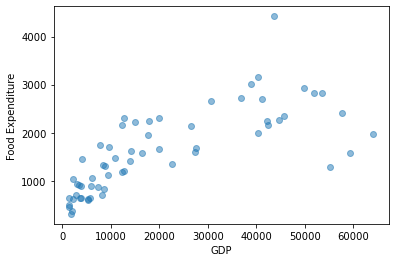

In [2]:
plt.scatter(if_data['GDP'],if_data['food_expenditure'], alpha=0.5)
plt.xlabel('GDP')
plt.ylabel('Food Expenditure')
plt.show()

As we can see the data points between GDP and food expenditure are correlated. From this scatter plot the association appears to be linear with many points in the range of GDP <20,000 and food expenditure <2,000. 

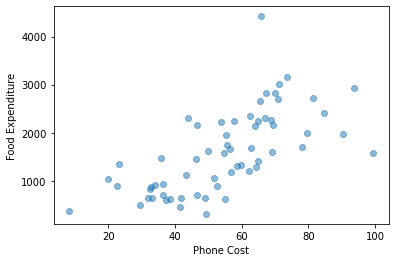

In [3]:
plt.scatter(if_data['phone_cost'],if_data['food_expenditure'], alpha=0.5)
plt.xlabel('Phone Cost')
plt.ylabel('Food Expenditure')
plt.show()

This graph shows the food expenditure as a function of food cost. Again the data appears to have a positive linear correlation with food expenditure increasing as phone cost increases.

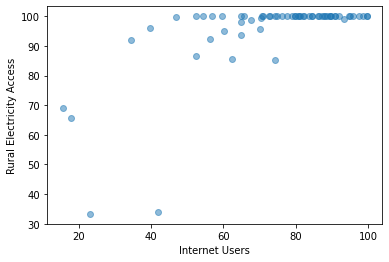

In [4]:
plt.scatter(if_data['internet_users'],if_data['rural_elec_access'], alpha=0.5)
plt.xlabel('Internet Users')
plt.ylabel('Rural Electricity Access')
plt.show()

This graph shows the relationship between Internet Users and Rural Electricity Access. The plot has many of the points clustered in the top right. To gain a better idea of the relationship we can perform a log transformation to attempt to linearize the data.  

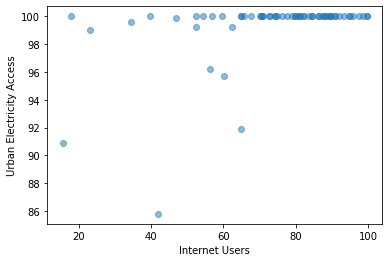

In [5]:
plt.scatter(if_data['internet_users'],if_data['urban_elec_access'], alpha=0.5)
plt.xlabel('Internet Users')
plt.ylabel('Urban Electricity Access')
plt.show()

This final plot is similar to the last in how the data has many points in the top right. We can also perform a log transformation on this plot to try and linearize the data.

## Data Limitations

The data is fairly robust and does not have too many limitations. One limitation is that the data is based around the experiences in each country, but the experiences in both internet and food expenditure can be different within each region of countries. This is especially true for larger countries and countries with vast differences in wealth across  regions. 

In addition, we are only looking at data from 2016. Although it does not necessarily limit our analysis, it is important to note that the data is 4 years old. It may not reflect 2020 scenarios. 


# Analysis 1

In [6]:
corr=if_data.corr()
corr_table=corr.loc['food_expenditure',:]
print('Correlation Coefficients of Food Expenditure and Internet Data')
print(corr_table)

Correlation Coefficients of Food Expenditure and Internet Data
Unnamed: 0          -0.085651
gender_gap          -0.358075
urban_elec_access    0.229720
rural_elec_access    0.330072
phone_cost           0.661712
web_access           0.419633
privacy_trust       -0.212550
electric_access      0.335970
gender_gap_pt       -0.238277
internet_users       0.663592
total_population    -0.285394
GDP                  0.740374
food_expenditure     1.000000
Name: food_expenditure, dtype: float64


<AxesSubplot:>

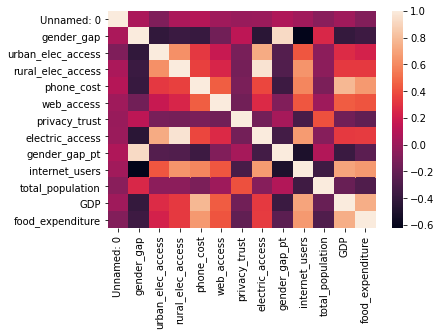

In [7]:
sns.heatmap(if_data.corr())

Based on the correlations listed above and the heatmap(which visualizes the correlations), we can conclude that the gender gap and privacy trust have the strongest negative correlation while phone cost and internet users have the strongest positive correlation with food expenditure. Below, we define two functions. The function plotreg makes a scatter plot of data. Plotreg_resid makes a scatter plot of predicted values for data vs standardized residuals. We used these two functions to help visualize the data and to make sure we can run linear regression on the data. 

In [8]:
def plotreg(data, x_label, y_label):
    """
    Makes a scatter plot of data['x_label'] vs data['y_label']
    """
    plt.scatter(data[x_label], data[y_label], alpha=.6)
    plt.title(x_label + ' vs ' + y_label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [9]:
def plotreg_resid(data, x_label, y_label):
    """
    Makes a scatter plot of predicted values for data['y_label'] vs standardized residuals
    (the number of standard deviations the actual values are away from their predicted value)
    """
    X=data[x_label]
    Y=data[y_label]
    X=sm.add_constant(X)
    model = sm.OLS(Y,X).fit()
    
    student_residuals = pd.Series(model.get_influence().resid_studentized_internal)
    fitted = model.fittedvalues
    plt.scatter(fitted, student_residuals, alpha=.6)
    plt.title('Fitted values vs Standardized Residuals')
    plt.xlabel('Fits')
    plt.ylabel('Std Resids')
    plt.hlines(y=0, colors='red', xmin=min(fitted), xmax=max(fitted))
    plt.show()
    return student_residuals

## Analysis 1, Part 1: Regression Analysis for Food Expenditure and Phone Cost 

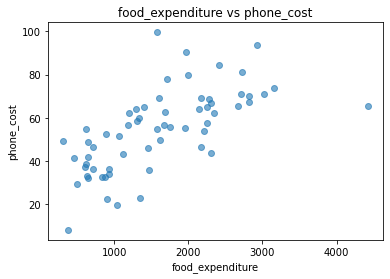

In [10]:
plotreg(if_data, 'food_expenditure', 'phone_cost')

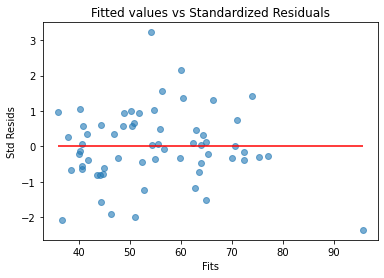

In [11]:
student_residuals = plotreg_resid(if_data, 'food_expenditure', 'phone_cost')

Since one of the points is more than 3 standard deviations from its predicted value, we will consider it an outlier. This country probably has an unusual situation where phone cost is way higher than expected due to tariffs or other specific factors. We will also remove the point in the bottom right corner because it is well outside of the range of the rest of the data in addition to being more than 2 standard deviations below its expected value.

In [12]:
#subset data to just phone cost and food expenditure
phone_data = if_data[['food_expenditure','phone_cost']]

#remove point more than 3 SD from predicted value
phone_data = phone_data[abs(student_residuals) <= 3]
#remove point outside of range
phone_data = phone_data[phone_data['food_expenditure'] < 4000]

phone_data.head()

,food_expenditure,phone_cost
0,639.0,32.0
1,2306.0,43.9
2,2927.0,93.6
3,2273.0,68.8
4,896.0,22.7


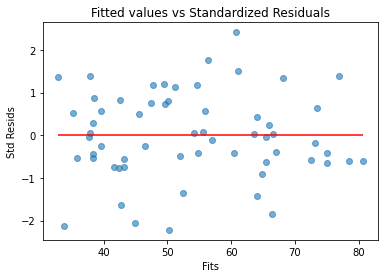

In [13]:
new_resid_plot =plotreg_resid(phone_data, 'food_expenditure', 'phone_cost')

<AxesSubplot:xlabel='food_expenditure', ylabel='phone_cost'>

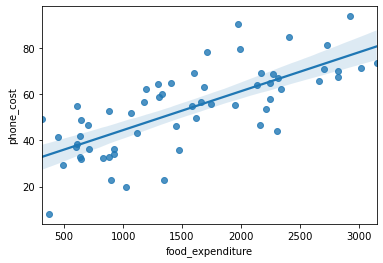

In [14]:
sns.regplot(x='food_expenditure', y='phone_cost', data=phone_data)

As you can see, the new plots look much more evenly spread.

In [15]:
food_phone=stats.linregress(phone_data['food_expenditure'], phone_data['phone_cost'])
slope_fp=food_phone[0]
intercept_fp=food_phone[1]
rsquared_fp=(food_phone[2]**2)
pvalue_fp=food_phone[3]
std_error_fp=food_phone[4]
print("the slope of food expenditure and phone cost is: {:.4f}".format(slope_fp))
print("the intercept of food expenditure and phone cost is: {:.4f}".format(intercept_fp))
print("the r-squared of food expenditure and phone cost is: {:.4f}".format(rsquared_fp))
print("the p-value of food expenditure and phone cost is: {:.4f}".format(pvalue_fp))

the slope of food expenditure and phone cost is: 0.0168
the intercept of food expenditure and phone cost is: 27.6338
the r-squared of food expenditure and phone cost is: 0.5376
the p-value of food expenditure and phone cost is: 0.0000


In [16]:
#confidence interval calculated here 
conf_int_fp=(slope_fp - std_error_fp * 1.96, slope_fp + std_error_fp * 1.96 )
print(conf_int_fp)

(0.012807202606773933, 0.020837701082847576)


Since the p-value of the t-test is 0.000, which is less than 0.05, there is clearly a relationship between food expenditure and phone cost. The regression equation is $phoneCost = 0.0168(foodExpenditure) + 27.6338$. In addition, the r-squared value is 0.5376 which shows that the relationship is relatively weak but it still exists. We calculated the confidence interval for the slope above and found that it was (0.0128,0.0208).

## Analysis 1, Part 2: Regression Analysis for Food Expenditure and Internet Users  

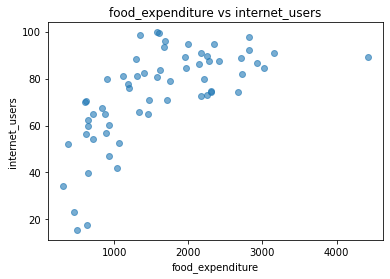

In [17]:
plotreg(if_data, 'food_expenditure', 'internet_users')

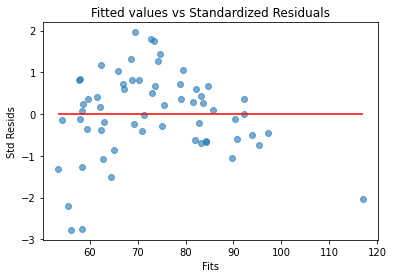

In [18]:
student_residuals = plotreg_resid(if_data, 'food_expenditure', 'internet_users')

In [19]:
#subset data to just internent_users and food_expenditure 
user_data = if_data[['food_expenditure','internet_users']]

#remove point outside of range
user_data = user_data[user_data['food_expenditure'] < 4000]

user_data.head()

,food_expenditure,internet_users
0,639.0,59.6
1,2306.0,74.3
2,2927.0,86.5
3,2273.0,87.7
4,896.0,79.8


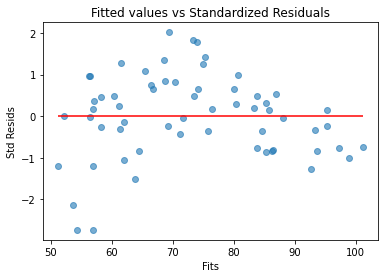

In [20]:
new_resid_plot =plotreg_resid(user_data, 'food_expenditure', 'internet_users')

Since the points are not evenly spread around the line in the graph above, we have to linearize the data. We will achieve this through taking the log of each variable 

In [21]:
user_data['log_foodexpend']=np.log(user_data['food_expenditure'])
user_data['log_internet_users']=np.log(user_data['internet_users'])

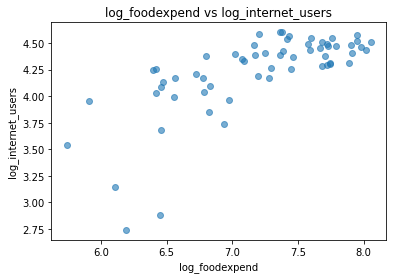

In [22]:
plotreg(user_data, 'log_foodexpend', 'log_internet_users')

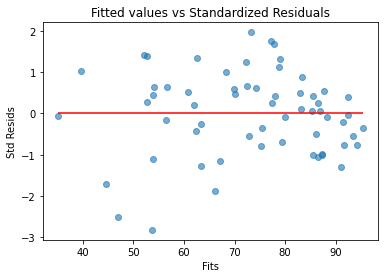

In [23]:
new_resid_plot =plotreg_resid(user_data, 'log_foodexpend', 'internet_users')

Taking the log of both variables did not result in a better plot, so we just took the log of food expenditure. The data is better distributed now, so we can now do linear regression. 

<AxesSubplot:xlabel='log_foodexpend', ylabel='internet_users'>

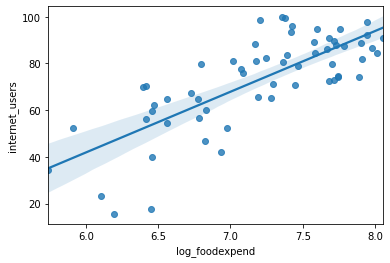

In [24]:
sns.regplot(x='log_foodexpend', y='internet_users', data=user_data)

In [25]:
food_user=stats.linregress(user_data['log_foodexpend'], user_data['internet_users'])
slope_fu=food_user[0]
intercept_fu=food_user[1]
rsquared_fu=(food_user[2]**2)
pvalue_fu=food_user[3]
std_error_fu=food_user[4]
print("the slope of the log of food expenditure and internet users is: {:.4f}".format(slope_fu))
print("the intercept of the log of food expenditure and internent users is: {:.4f}".format(intercept_fu))
print("the r-squared of the log of food expenditure and internet users is: {:.4f}".format(rsquared_fu))
print("the p-value of the log of food expenditure and internet users  is: {:.4f}".format(pvalue_fu))

the slope of the log of food expenditure and internet users is: 26.0245
the intercept of the log of food expenditure and internent users is: -114.2829
the r-squared of the log of food expenditure and internet users is: 0.5816
the p-value of the log of food expenditure and internet users  is: 0.0000


In [26]:
#confidence interval calculated here 
conf_int_fu=(slope_fu - std_error_fu * 1.96, slope_fu + std_error_fu * 1.96 )
print(conf_int_fu)

(20.391950720509456, 31.65710715773845)


Since the p-value of the t-test is 0.000, which is less than 0.05, there is clearly a relationship between food expenditure and internet users. The regression equation is $internet_users = 26.0245(log(FoodExpenditure)) + -114.2829$. In addition, the r-squared value is 0.5816 which shows that the relationship is relatively weak but it still exists. We calculated the confidence interval for the slope above and found that it was () **ADDRESS Confidence interval later **

## Analysis 1, Part 3: Regression Analysis for Food Expenditure and Gender Gap

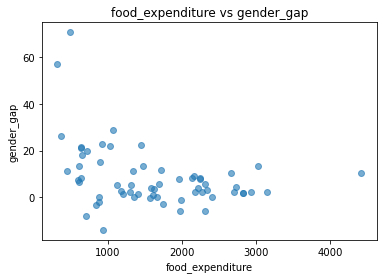

In [27]:
plotreg(if_data, 'food_expenditure', 'gender_gap')

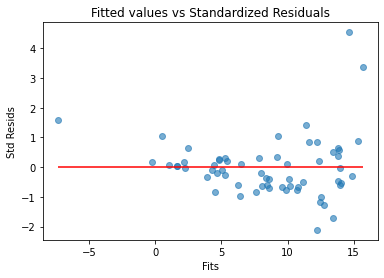

In [28]:
student_residuals = plotreg_resid(if_data, 'food_expenditure', 'gender_gap')

In [29]:
#subset data to just gender_gap and food_expenditure 
gender_data = if_data[['food_expenditure','gender_gap']]

#remove point more than 3 SD from predicted value
gender_data = gender_data[abs(student_residuals) <= 3]
#remove point outside of range
gender_data = gender_data[gender_data['food_expenditure'] < 4000]

gender_data.head()

,food_expenditure,gender_gap
0,639.0,21.7
1,2306.0,-5.7
2,2927.0,2.1
3,2273.0,2.2
4,896.0,15.0


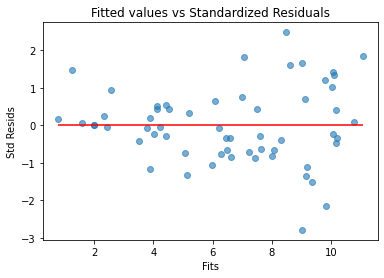

In [30]:
new_resid_plot =plotreg_resid(gender_data, 'food_expenditure', 'gender_gap')

The graph above shows that the variance increases as the graph goes up. We took the log of both variables (as shown through the commented out code below); however we experienced issues with taking the log in this situation. We were able to take the log in part two since we only had to manipulate the X variable. In this situation, we would have to manipulate both the X and Y variable which is much more complicated Since it is beyond the scope of this course, we ran the linear regression on unlinearized variables. 

In [31]:
#gender_data['log_gendergap']=np.log(gender_data['gender_gap'])
#gender_data['log_foodexpend']=np.log(gender_data['food_expenditure'])

In [32]:
#plotreg(gender_data, 'log_foodexpend', 'log_gendergap')

In [33]:
#new_resid_plot =plotreg_resid(gender_data, 'log_foodexpend', 'log_gendergap')

<AxesSubplot:xlabel='food_expenditure', ylabel='gender_gap'>

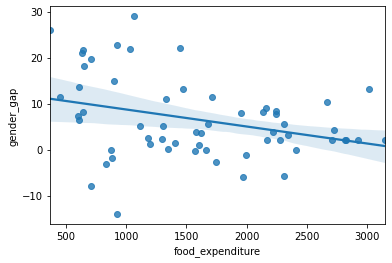

In [34]:
sns.regplot(x='food_expenditure', y='gender_gap', data=gender_data)

In [35]:
food_gender=stats.linregress(gender_data['food_expenditure'], gender_data['gender_gap'])
slope_fg=food_gender[0]
intercept_fg=food_gender[1]
rsquared_fg=(food_gender[2]**2)
pvalue_fg=food_gender[3]
std_error_fg=food_gender[4]
print("the slope of food expenditure and gender gap is: {:.4f}".format(slope_fg))
print("the intercept of food expenditure and gender gap is: {:.4f}".format(intercept_fg))
print("the r-squared of food expenditure and gender gap is: {:.4f}".format(rsquared_fg))
print("the p-value of food expenditure and gender gap is: {:.4f}".format(pvalue_fg))

the slope of food expenditure and gender gap is: -0.0037
the intercept of food expenditure and gender gap is: 12.4341
the r-squared of food expenditure and gender gap is: 0.1036
the p-value of food expenditure and gender gap is: 0.0129


In [36]:
#confidence interval calculated here 
conf_int_fg=(slope_fg - std_error_fg * 1.96, slope_fg + std_error_fg * 1.96 )
print(conf_int_fg)

(-0.006524940533022413, -0.0008740738351676763)


Since the p-value of the t-test is 0.0129, which is less than 0.05, there is a relationship between food expenditure and internet users. The regression equation is $gendergap = -0.0037(FoodExpenditure) + 12.4341$. In addition, the r-squared value is 0.1036 which shows that the relationship is extremely weak. This means that food expenditure is not a good predictor of gender gap. We calculated the confidence interval for the slope above and found that it was (-0.0065, -0.00087) 

## Analysis 1, Part 4: Regression Analysis for Food Expenditure and Privacy Trust  

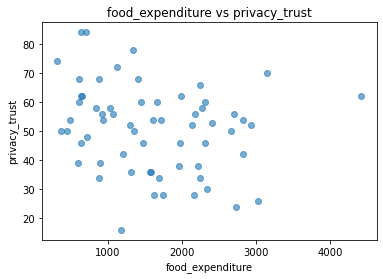

In [37]:
plotreg(if_data, 'food_expenditure', 'privacy_trust')

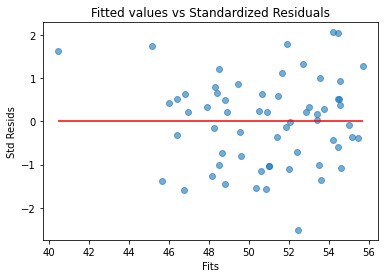

In [38]:
student_residuals = plotreg_resid(if_data, 'food_expenditure', 'privacy_trust')

In [39]:
#subset data to just privacy_trust and food_expenditure 
privacy_data = if_data[['food_expenditure','privacy_trust']]

#remove point outside of range
privacy_data = privacy_data[privacy_data['food_expenditure'] < 4000]

privacy_data.head()

,food_expenditure,privacy_trust
0,639.0,46.0
1,2306.0,60.0
2,2927.0,52.0
3,2273.0,58.0
4,896.0,39.0


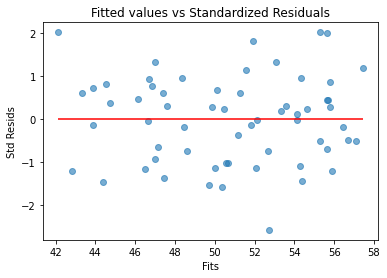

In [40]:
new_resid_plot=plotreg_resid(privacy_data, 'food_expenditure', 'privacy_trust')

The data points are spread out evenly around the line in the graph above 

<AxesSubplot:xlabel='food_expenditure', ylabel='privacy_trust'>

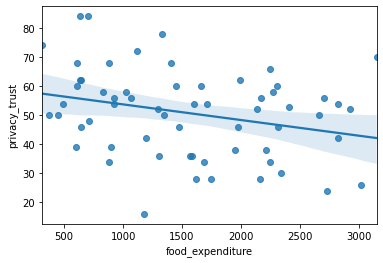

In [41]:
sns.regplot(x='food_expenditure', y='privacy_trust', data=privacy_data)

In [42]:
food_privacy=stats.linregress(privacy_data['food_expenditure'], privacy_data['privacy_trust'])
slope_fp=food_privacy[0]
intercept_fp=food_privacy[1]
rsquared_fp=(food_privacy[2]**2)
pvalue_fp=food_privacy[3]
std_error_fp=food_privacy[4]
print("the slope of the log of food expenditure and food privacy is: {:.4f}".format(slope_fp))
print("the intercept of the log of food expenditure and food privacy is: {:.4f}".format(intercept_fp))
print("the r-squared of the log of food expenditure and food privacy is: {:.4f}".format(rsquared_fp))
print("the p-value of the log of food expenditure and food privacy is: {:.4f}".format(pvalue_fp))

the slope of the log of food expenditure and food privacy is: -0.0054
the intercept of the log of food expenditure and food privacy is: 59.0994
the r-squared of the log of food expenditure and food privacy is: 0.0793
the p-value of the log of food expenditure and food privacy is: 0.0279


In [43]:
#confidence interval calculated here 
conf_int_fu=(slope_fp - std_error_fp * 1.96, slope_fp + std_error_fp * 1.96 )
print(conf_int_fp)

(0.012807202606773933, 0.020837701082847576)


Since the p-value of the t-test is 0.0279, which is less than 0.05, there is clearly a relationship between food expenditure and internet users. The regression equation is $internetusers = -0.0054(FoodExpenditure) + 59.0994$. In addition, the r-squared value is 0.0793 which shows that the relationship is extremely weak. Food expenditure is a poor predictor of privacy trust. The confidence interval is (0.0128,0.0208)

## Interpretations and Conclusions for Analysis 1 (ADD)
make sure to explain what each of the variables actually are (based on original column names from the original data). 
summarize what was said above and come to conclusions 

# Analysis 2


## Model Building

In this section, we are going to try to fit a model where we use the columns we picked as predictors for level of web accessability. While we know that the relationships between many of these columns and level of web accessability are not causal, we could still use them as predictors if there is a strong correlation. We are going to build the model using AIC and BIC selection. AIC (Akaike's Information Criteria) often overestimates the number of significant predictors and is best for large datasets where number of observations divided by number of candidate variables is greater than 40. Since this is not the case for our data set, we will start with BIC (Bayesian Information Criteria), which underestimates the number of significant predictors.

In [44]:
from sklearn import linear_model
data = if_data.copy()
X = data.drop(['country', 'web_access', 'Unnamed: 0'], axis=1) #X is an array of all of the candidate variables
y = data['web_access'] #y is the dependent variable, web accessibility
model = linear_model.LassoLarsIC('bic').fit(X, y)
print('Coefficients:\n' + str(model.coef_))
X.head()

Coefficients:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


,gender_gap,urban_elec_access,rural_elec_access,phone_cost,privacy_trust,electric_access,gender_gap_pt,internet_users,total_population,GDP,food_expenditure
0,21.7,100.0,100.0,32.0,46.0,100.0,13.0,59.6,40551000.0,3916.881571,639.0
1,-5.7,100.0,85.3,43.9,60.0,98.8,-4.0,74.3,43508000.0,12654.354999,2306.0
2,2.1,100.0,100.0,93.6,52.0,100.0,2.0,86.5,24263000.0,49896.681101,2927.0
3,2.2,100.0,100.0,68.8,58.0,100.0,2.0,87.7,8747000.0,44731.010855,2273.0
4,15.0,100.0,100.0,22.7,39.0,100.0,12.0,79.8,9736000.0,3880.738731,896.0


Given that all of the coefficients are zero, BIC is saying that none of the predictors are statistically significant. We will try AIC instead:

In [45]:
modelA = linear_model.LassoLarsIC('aic').fit(X, y)

print('Coefficients:\n' + str(modelA.coef_))
print('\nR squared: ' + str(modelA.score(X,y)))

Coefficients:
[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.16543390e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.83794449e-03
 0.00000000e+00 3.29149392e-06 9.49257984e-05]

R squared: 0.23494436688426745


Most of the coefficients of significant predictors are close to zero, and the R squared value is very low. Since AIC is the more generous of the two criteria, the columns we chose arbitrarily clearly do not have a strong correlation with web accessibility. After seeing this result, we rethought about what we are really trying to do here. We realized that it did not make sense to drop columns while cleaning the dataset because some of those columns may have had a correlation with web access. Therefore, we are going to try building a model with the entire internet acessibility dataset. It is already clean other than the fact that the column names are long, but there are many columns and the long names help accurately describe what they represent, so we will leave the full dataset as is for now as you can see below.

In [46]:
full_internet_data = pd.read_csv("3i-index-data.csv", encoding='latin-1')

new_colnames_full = [c[c.find(')') + 2:].lower() for c in full_internet_data.columns]
new_colnames_full = [c.replace(' ', '_') for c in new_colnames_full]
new_colnames_full = [c[:c.find('/')] + '(' + c[c.find('/') + 2:] + ')' for c in new_colnames_full]

full_internet_data.columns = new_colnames_full

full_internet_data.head()

,s(o),ountry(roup),internet_users_(%_of_households),fixed-line_broadband_subscribers_(per_100_inhabitants),mobile_subscribers_(per_100_inhabitants),gender_gap_in_internet_access_(%_difference),gender_gap_in_mobile_phone_access_(%_difference),average_fixed_broadband_upload_speed_(kbps),average_fixed_broadband_download_speed_(kbps),average_fixed_broadband_latency_(ms),...,internet_users_(population)_(millions),offline_population_(millions),internet_access_gender_gap_(difference_in_percentage_points),mobile_phone_access_gender_gap_(difference_in_percentage_points),internet_users_(percent_of_population)_(%_of_population),male_internet_users_(%_of_male_population),female_internet_users_(%_of_female_population),male_mobile_phone_subscribers_(%_of_male_population),female_mobile_phone_subscribers_(%_of_female_population),total_fixed_line_broadband_subscribers_(number_of_subscriptions)
0,DZ,Algeria,74.4,7.26,121.9,21.7,7.3,2090.0,3990.0,64.0,...,25.16,17.07,13.0,6.0,59.6,60.0,47.0,82.0,76.0,3063835.0
1,AR,Argentina,75.9,19.10,130.0,-5.7,-3.6,7960.0,33960.0,31.0,...,32.64,11.29,-4.0,-3.0,74.3,70.0,74.0,83.0,86.0,8473655.0
2,AU,Australia,86.1,32.22,113.6,2.1,2.2,20030.0,42630.0,24.0,...,21.28,3.31,2.0,2.0,86.5,94.0,92.0,93.0,91.0,7922000.0
3,AT,Austria,88.8,28.35,123.5,2.2,-1.0,16920.0,55030.0,20.0,...,7.80,1.09,2.0,-1.0,87.7,91.0,89.0,96.0,97.0,2521000.0
4,AZ,Azerbaijan,78.2,18.20,103.9,15.0,11.5,23490.0,21200.0,31.0,...,7.94,2.01,12.0,11.0,79.8,80.0,68.0,96.0,85.0,1810474.0


In [47]:
X = full_internet_data.drop(['s(o)', 'ountry(roup)', 'level_of_web_accessibility_(qualitative_rating_0-4,_4=best)'], axis=1) #X is an array of all of the candidate variables
y = full_internet_data['level_of_web_accessibility_(qualitative_rating_0-4,_4=best)'] #y is the dependent variable, web accessibility

model = linear_model.LassoLarsIC('bic').fit(X, y)

print('Coefficients:\n' + str(model.coef_))
print('\nR squared: ' + str(model.score(X,y)))

Coefficients:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.04015812 0.
 0.07166296 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]

R squared: 0.12944699340899413


In [48]:
modelA = linear_model.LassoLarsIC('aic').fit(X, y)

print('Coefficients:\n' + str(modelA.coef_))
print('\nR squared: ' + str(modelA.score(X,y)))

Coefficients:
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.40793729e-07
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  7.60446042e-02  4.98340508e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.30333322e-02  0.00000000e+00
  0.00000000e+00  3.71069061e-04  0.00000000e+00  0.00000000e+00
 -1.21491943e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.03947231e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.58977357e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.13541277e-01  0.00000000e+00  0.00000000e+00  1.41328427e-01
  0.0000000

In [49]:
#find which variables are significant according to AIC criteria

coefficients = []

for i in range(len(modelA.coef_)):
    if modelA.coef_[i] != 0:
        coefficients.append(X.columns[i])

#do linear regression with only those columns as the predictors
import statsmodels.api as sm

reg12 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.833
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.814
Method:                                                          Least Squares   F-statistic:                              44.43
Date:                                                         Sat, 05 Dec 2020   Prob (F-statistic):                    5.32e-36
Time:                                                                 17:12:55   Log-Likelihood:                         -132.71
No. Observations:                                                          119   AIC:                                      289.4
Df Residuals:                                                              107   BIC:                                      322.8
Df Model:                                                                   12                                                  
Covariance Type:                                                     nonrobust                                                  
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
bandwidth_capacity_(bit/s_per_internet_user)                                             -2.878e-07   9.75e-08     -2.952      0.004   -4.81e-07   -9.45e-08
private_sector_initiatives_to_make_wi-fi_available_(qualitative_rating_0-2,_2=best)          0.1297      0.104      1.250      0.214      -0.076       0.335
internet_exchange_points_(number_of_ixps_per_10_million_inhabitants)                         0.0215      0.020      1.067      0.288      -0.018       0.061
mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)                             0.0640      0.020      3.180      0.002       0.024       0.104
average_revenue_per_user_(arpu,_annualized)_(usd)                                        -3.859e-06      0.001     -0.004      0.997      -0.002       0.002
availability_of_basic_information_in_the_local_language_(qualitative_rating_0-3,_3=best)    -0.2766      0.146     -1.889      0.062      -0.567       0.014
value_of_e-finance_(%)                                                                      -0.0150      0.006     -2.569      0.012      -0.027      -0.003
support_for_digital_literacy_(qualitative_rating_0-3,_3=best)                                0.2060      0.100      2.070      0.041       0.009       0.403
technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)               0.3957      0.242      1.637      0.104      -0.083       0.875
government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)                            0.2142      0.081      2.656      0.009       0.054       0.374
democracy_index_(score,_0-10;_10_=_best)                                                     0.0927      0.055      1.673      0.097      -0.017       0.202
eiu_business_environment_rankings_(score,_1-10,_10_=_high)                                   0.1691      0.114      1.489      0.139      -0.056       0.394
==============================================================================
Omnibus:                        1.733   Durbin-Watson:                   1.994
Prob(Omnibus):      

In [50]:
coefficients.remove('bandwidth_capacity_(bit/s_per_internet_user)')
reg11 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.819
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.801
Method:                                                          Least Squares   F-statistic:                              44.50
Date:                                                         Sat, 05 Dec 2020   Prob (F-statistic):                    4.72e-35
Time:                                                                 17:12:55   Log-Likelihood:                         -137.37
No. Observations:                                                          119   AIC:                                      296.7
Df Residuals:                                                              108   BIC:                                      327.3
Df Model:                                                                   11                                                  
Covariance Type:                                                     nonrobust                                                  
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
private_sector_initiatives_to_make_wi-fi_available_(qualitative_rating_0-2,_2=best)          0.1334      0.107      1.243      0.217      -0.079       0.346
internet_exchange_points_(number_of_ixps_per_10_million_inhabitants)                         0.0169      0.021      0.815      0.417      -0.024       0.058
mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)                             0.0683      0.021      3.288      0.001       0.027       0.109
average_revenue_per_user_(arpu,_annualized)_(usd)                                            0.0002      0.001      0.190      0.849      -0.002       0.002
availability_of_basic_information_in_the_local_language_(qualitative_rating_0-3,_3=best)    -0.2066      0.150     -1.381      0.170      -0.503       0.090
value_of_e-finance_(%)                                                                      -0.0159      0.006     -2.643      0.009      -0.028      -0.004
support_for_digital_literacy_(qualitative_rating_0-3,_3=best)                                0.2095      0.103      2.033      0.044       0.005       0.414
technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)               0.3890      0.250      1.555      0.123      -0.107       0.885
government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)                            0.1952      0.083      2.344      0.021       0.030       0.360
democracy_index_(score,_0-10;_10_=_best)                                                     0.1171      0.057      2.066      0.041       0.005       0.229
eiu_business_environment_rankings_(score,_1-10,_10_=_high)                                   0.1117      0.116      0.965      0.337      -0.118       0.341
==============================================================================
Omnibus:                        1.423   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                0.974
Skew:                           0.001   Prob(JB):                        0.614
Kurtosis:          

In [51]:
coefficients.remove('average_revenue_per_user_(arpu,_annualized)_(usd)')
reg10 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.819
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.803
Method:                                                          Least Squares   F-statistic:                              49.38
Date:                                                         Sat, 05 Dec 2020   Prob (F-statistic):                    6.64e-36
Time:                                                                 17:12:55   Log-Likelihood:                         -137.39
No. Observations:                                                          119   AIC:                                      294.8
Df Residuals:                                                              109   BIC:                                      322.6
Df Model:                                                                   10                                                  
Covariance Type:                                                     nonrobust                                                  
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
private_sector_initiatives_to_make_wi-fi_available_(qualitative_rating_0-2,_2=best)          0.1328      0.107      1.243      0.217      -0.079       0.345
internet_exchange_points_(number_of_ixps_per_10_million_inhabitants)                         0.0172      0.021      0.835      0.406      -0.024       0.058
mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)                             0.0676      0.020      3.322      0.001       0.027       0.108
availability_of_basic_information_in_the_local_language_(qualitative_rating_0-3,_3=best)    -0.2132      0.145     -1.472      0.144      -0.500       0.074
value_of_e-finance_(%)                                                                      -0.0164      0.005     -2.986      0.003      -0.027      -0.006
support_for_digital_literacy_(qualitative_rating_0-3,_3=best)                                0.2101      0.103      2.050      0.043       0.007       0.413
technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)               0.3832      0.247      1.550      0.124      -0.107       0.873
government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)                            0.1989      0.081      2.468      0.015       0.039       0.359
democracy_index_(score,_0-10;_10_=_best)                                                     0.1176      0.056      2.087      0.039       0.006       0.229
eiu_business_environment_rankings_(score,_1-10,_10_=_high)                                   0.1225      0.101      1.218      0.226      -0.077       0.322
==============================================================================
Omnibus:                        1.445   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.486   Jarque-Bera (JB):                0.998
Skew:                           0.005   Prob(JB):                        0.607
Kurtosis:                       3.448   Cond. No.                         183.
==============================================================================

Notes:
[1] R² is 

In [52]:
coefficients.remove('private_sector_initiatives_to_make_wi-fi_available_(qualitative_rating_0-2,_2=best)')
reg9 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.817
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.802
Method:                                                          Least Squares   F-statistic:                              54.43
Date:                                                         Sat, 05 Dec 2020   Prob (F-statistic):                    1.85e-36
Time:                                                                 17:12:55   Log-Likelihood:                         -138.23
No. Observations:                                                          119   AIC:                                      294.5
Df Residuals:                                                              110   BIC:                                      319.5
Df Model:                                                                    9                                                  
Covariance Type:                                                     nonrobust                                                  
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
internet_exchange_points_(number_of_ixps_per_10_million_inhabitants)                         0.0165      0.021      0.797      0.427      -0.024       0.057
mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)                             0.0667      0.020      3.273      0.001       0.026       0.107
availability_of_basic_information_in_the_local_language_(qualitative_rating_0-3,_3=best)    -0.2239      0.145     -1.545      0.125      -0.511       0.063
value_of_e-finance_(%)                                                                      -0.0163      0.005     -2.958      0.004      -0.027      -0.005
support_for_digital_literacy_(qualitative_rating_0-3,_3=best)                                0.2121      0.103      2.064      0.041       0.008       0.416
technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)               0.4316      0.245      1.764      0.081      -0.053       0.916
government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)                            0.2055      0.081      2.550      0.012       0.046       0.365
democracy_index_(score,_0-10;_10_=_best)                                                     0.1225      0.056      2.173      0.032       0.011       0.234
eiu_business_environment_rankings_(score,_1-10,_10_=_high)                                   0.1450      0.099      1.462      0.146      -0.051       0.342
==============================================================================
Omnibus:                        1.524   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.076
Skew:                           0.046   Prob(JB):                        0.584
Kurtosis:                       3.457   Cond. No.                         180.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is c

In [53]:
coefficients.remove('internet_exchange_points_(number_of_ixps_per_10_million_inhabitants)')
reg8 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.816
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.802
Method:                                                          Least Squares   F-statistic:                              61.36
Date:                                                         Sat, 05 Dec 2020   Prob (F-statistic):                    3.12e-37
Time:                                                                 17:12:55   Log-Likelihood:                         -138.57
No. Observations:                                                          119   AIC:                                      293.1
Df Residuals:                                                              111   BIC:                                      315.4
Df Model:                                                                    8                                                  
Covariance Type:                                                     nonrobust                                                  
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)                             0.0648      0.020      3.205      0.002       0.025       0.105
availability_of_basic_information_in_the_local_language_(qualitative_rating_0-3,_3=best)    -0.2362      0.144     -1.641      0.104      -0.521       0.049
value_of_e-finance_(%)                                                                      -0.0165      0.005     -3.005      0.003      -0.027      -0.006
support_for_digital_literacy_(qualitative_rating_0-3,_3=best)                                0.2103      0.103      2.051      0.043       0.007       0.414
technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)               0.4370      0.244      1.790      0.076      -0.047       0.921
government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)                            0.2107      0.080      2.627      0.010       0.052       0.370
democracy_index_(score,_0-10;_10_=_best)                                                     0.1266      0.056      2.259      0.026       0.016       0.238
eiu_business_environment_rankings_(score,_1-10,_10_=_high)                                   0.1551      0.098      1.580      0.117      -0.039       0.350
==============================================================================
Omnibus:                        1.204   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                0.746
Skew:                           0.040   Prob(JB):                        0.689
Kurtosis:                       3.379   Cond. No.                         180.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
coefficients.remove('eiu_business_environment_rankings_(score,_1-10,_10_=_high)')
reg7 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.811
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.800
Method:                                                          Least Squares   F-statistic:                              68.85
Date:                                                         Sat, 05 Dec 2020   Prob (F-statistic):                    1.22e-37
Time:                                                                 17:12:56   Log-Likelihood:                         -139.90
No. Observations:                                                          119   AIC:                                      293.8
Df Residuals:                                                              112   BIC:                                      313.2
Df Model:                                                                    7                                                  
Covariance Type:                                                     nonrobust                                                  
============================================================================================================================================================
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------
mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)                             0.0731      0.020      3.724      0.000       0.034       0.112
availability_of_basic_information_in_the_local_language_(qualitative_rating_0-3,_3=best)    -0.0888      0.110     -0.805      0.422      -0.307       0.130
value_of_e-finance_(%)                                                                      -0.0152      0.005     -2.790      0.006      -0.026      -0.004
support_for_digital_literacy_(qualitative_rating_0-3,_3=best)                                0.2376      0.102      2.335      0.021       0.036       0.439
technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)               0.4535      0.246      1.847      0.067      -0.033       0.940
government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)                            0.2739      0.070      3.916      0.000       0.135       0.413
democracy_index_(score,_0-10;_10_=_best)                                                     0.1768      0.046      3.805      0.000       0.085       0.269
==============================================================================
Omnibus:                        1.103   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.576   Jarque-Bera (JB):                0.648
Skew:                           0.064   Prob(JB):                        0.723
Kurtosis:                       3.338   Cond. No.                         178.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
coefficients.remove('availability_of_basic_information_in_the_local_language_(qualitative_rating_0-3,_3=best)')
reg6 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.810
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.800
Method:                                                          Least Squares   F-statistic:                              80.46
Date:                                                         Sat, 05 Dec 2020   Prob (F-statistic):                    1.79e-38
Time:                                                                 17:12:56   Log-Likelihood:                         -140.24
No. Observations:                                                          119   AIC:                                      292.5
Df Residuals:                                                              113   BIC:                                      309.2
Df Model:                                                                    6                                                  
Covariance Type:                                                     nonrobust                                                  
==================================================================================================================================================
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------
mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)                   0.0723      0.020      3.693      0.000       0.034       0.111
value_of_e-finance_(%)                                                            -0.0174      0.005     -3.637      0.000      -0.027      -0.008
support_for_digital_literacy_(qualitative_rating_0-3,_3=best)                      0.2111      0.096      2.196      0.030       0.021       0.402
technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)     0.4067      0.238      1.707      0.091      -0.065       0.879
government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)                  0.2659      0.069      3.847      0.000       0.129       0.403
democracy_index_(score,_0-10;_10_=_best)                                           0.1748      0.046      3.773      0.000       0.083       0.267
==============================================================================
Omnibus:                        0.960   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.554
Skew:                           0.123   Prob(JB):                        0.758
Kurtosis:                       3.226   Cond. No.                         173.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
coefficients.remove('technology-neutrality_policy_for_spectrum_use_(qualitative_rating_0-1,_1=best)')
reg5 = sm.OLS(y, full_internet_data[coefficients]).fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.805
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.797
Method:                                                          Least Squares   F-statistic:                              94.39
Date:                                                         Sat, 05 Dec 2020   Prob (F-statistic):                    7.28e-39
Time:                                                                 17:12:56   Log-Likelihood:                         -141.76
No. Observations:                                                          119   AIC:                                      293.5
Df Residuals:                                                              114   BIC:                                      307.4
Df Model:                                                                    5                                                  
Covariance Type:                                                     nonrobust                                                  
=====================================================================================================================================
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)      0.0762      0.020      3.884      0.000       0.037       0.115
value_of_e-finance_(%)                                               -0.0170      0.005     -3.532      0.001      -0.027      -0.007
support_for_digital_literacy_(qualitative_rating_0-3,_3=best)         0.2616      0.092      2.836      0.005       0.079       0.444
government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)     0.2751      0.069      3.959      0.000       0.137       0.413
democracy_index_(score,_0-10;_10_=_best)                              0.2047      0.043      4.734      0.000       0.119       0.290
==============================================================================
Omnibus:                        1.637   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.150   Prob(JB):                        0.566
Kurtosis:                       3.373   Cond. No.                         67.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
print(coefficients)

['mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)', 'value_of_e-finance_(%)', 'support_for_digital_literacy_(qualitative_rating_0-3,_3=best)', 'government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)', 'democracy_index_(score,_0-10;_10_=_best)']


In [58]:
newNames = {'mobile_phone_cost_(prepaid_tariff)_(%_of_monthly_gni_per_capita)':'Cell_Cost', 'value_of_e-finance_(%)':'E-Finance_Value','support_for_digital_literacy_(qualitative_rating_0-3,_3=best)':'Support_For_Dig_Lit','government_efforts_to_promote_5g_(qualitative_rating_0-3,_3=best)':'Govt_Promote_5g','democracy_index_(score,_0-10;_10_=_best)':'Democracy_Index'}
full_internet_data = full_internet_data.rename(columns=newNames)
coefficients = list(newNames.values())

In [59]:
from sklearn.preprocessing import PolynomialFeatures
interaction = PolynomialFeatures(degree=2).fit_transform(full_internet_data[coefficients])
interaction = pd.DataFrame(interaction)
full_internet_data[coefficients].head()

,Cell_Cost,E-Finance_Value,Support_For_Dig_Lit,Govt_Promote_5g,Democracy_Index
0,2.04,32.0,1.0,0.0,3.5
1,1.12,62.0,3.0,0.0,7.0
2,0.50,44.0,3.0,3.0,9.1
3,0.16,50.0,3.0,3.0,8.3
4,1.38,45.0,1.0,0.0,2.6


In [60]:
interaction.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,2.04,32.0,1.0,0.0,3.5,4.1616,65.28,2.04,0.00,...,1024.0,32.0,0.0,112.0,1.0,0.0,3.5,0.0,0.0,12.25
1,1.0,1.12,62.0,3.0,0.0,7.0,1.2544,69.44,3.36,0.00,...,3844.0,186.0,0.0,434.0,9.0,0.0,21.0,0.0,0.0,49.00
2,1.0,0.50,44.0,3.0,3.0,9.1,0.2500,22.00,1.50,1.50,...,1936.0,132.0,132.0,400.4,9.0,9.0,27.3,9.0,27.3,82.81
3,1.0,0.16,50.0,3.0,3.0,8.3,0.0256,8.00,0.48,0.48,...,2500.0,150.0,150.0,415.0,9.0,9.0,24.9,9.0,24.9,68.89
4,1.0,1.38,45.0,1.0,0.0,2.6,1.9044,62.10,1.38,0.00,...,2025.0,45.0,0.0,117.0,1.0,0.0,2.6,0.0,0.0,6.76


In [61]:
internet_data_SQ = full_internet_data.copy()
coefficients_SQ = coefficients.copy()

In [62]:
internet_data_SQ['Cell_Cost_SQ'] = interaction[6]
internet_data_SQ['E-Finance_Value_SQ'] = interaction[11]
internet_data_SQ['Support_For_Dig_Lit_SQ'] = interaction[15]
internet_data_SQ['Govt_Promote_5g_SQ'] = interaction[18]
internet_data_SQ['Democracy_Index_SQ'] = interaction[20]

In [63]:
coefficients_SQ.extend(['Cell_Cost_SQ','E-Finance_Value_SQ','Support_For_Dig_Lit_SQ','Govt_Promote_5g_SQ','Democracy_Index_SQ'])

In [64]:
regSQ5 = sm.OLS(y, internet_data_SQ[coefficients_SQ]).fit()
regSQ5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.813
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.796
Method:                                                          Least Squares   F-statistic:                              47.32
Date:                                                         Sat, 05 Dec 2020   Prob (F-statistic):                    4.31e-35
Time:                                                                 17:12:56   Log-Likelihood:                         -139.47
No. Observations:                                                          119   AIC:                                      298.9
Df Residuals:                                                              109   BIC:                                      326.7
Df Model:                                                                   10                                                  
Covariance Type:                                                     nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Cell_Cost                  0.0016      0.072      0.023      0.982      -0.142       0.145
E-Finance_Value           -0.0332      0.022     -1.541      0.126      -0.076       0.009
Support_For_Dig_Lit        0.3744      0.406      0.922      0.358      -0.430       1.179
Govt_Promote_5g           -0.1690      0.294     -0.575      0.566      -0.751       0.413
Democracy_Index            0.4632      0.218      2.124      0.036       0.031       0.896
Cell_Cost_SQ               0.0035      0.004      0.918      0.360      -0.004       0.011
E-Finance_Value_SQ         0.0001      0.000      0.664      0.508      -0.000       0.001
Support_For_Dig_Lit_SQ    -0.0343      0.108     -0.318      0.751      -0.248       0.179
Govt_Promote_5g_SQ         0.1479      0.093      1.590      0.115      -0.037       0.332
Democracy_Index_SQ        -0.0244      0.019     -1.253      0.213      -0.063       0.014
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.081
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       3.120   Cond. No.                     1.79e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

finalize model with significant interaction terms
plot multivariable regression maybe
write it uppp

Since the squared values all increased the p values, we shall re remove them.

In [65]:
internet_data_inter = full_internet_data.copy()
coefficients_inter = coefficients.copy()

In [66]:
for i in interaction.columns:
    if i not in [0,1,2,3,4,5,6,11,15,18,20]:
        internet_data_inter['interaction ' + str(i)] = interaction[i]
        coefficients_inter.append('interaction ' + str(i))

In [67]:
regi = sm.OLS(y, internet_data_inter[coefficients_inter]).fit()
regi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.823
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.798
Method:                                                          Least Squares   F-statistic:                              32.30
Date:                                                         Sat, 05 Dec 2020   Prob (F-statistic):                    2.49e-32
Time:                                                                 17:12:56   Log-Likelihood:                         -136.03
No. Observations:                                                          119   AIC:                                      302.1
Df Residuals:                                                              104   BIC:                                      343.7
Df Model:                                                                   15                                                  
Covariance Type:                                                     nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Cell_Cost               0.1259      0.111      1.131      0.260      -0.095       0.347
E-Finance_Value        -0.0248      0.018     -1.359      0.177      -0.061       0.011
Support_For_Dig_Lit    -0.2218      0.360     -0.617      0.539      -0.935       0.491
Govt_Promote_5g         1.0106      0.422      2.396      0.018       0.174       1.847
Democracy_Index         0.3251      0.219      1.488      0.140      -0.108       0.758
interaction 7          -0.0011      0.002     -0.567      0.572      -0.005       0.003
interaction 8           0.0409      0.027      1.497      0.138      -0.013       0.095
interaction 9          -0.0785      0.065     -1.213      0.228      -0.207       0.050
interaction 10         -0.0096      0.020     -0.490      0.625      -0.048       0.029
interaction 12          0.0050      0.008      0.643      0.522      -0.010       0.020
interaction 13         -0.0056      0.005     -1.100      0.274      -0.016       0.004
interaction 14          0.0008      0.003      0.300      0.765      -0.005       0.006
interaction 16          0.0572      0.119      0.482      0.631      -0.178       0.293
interaction 17         -0.0034      0.064     -0.053      0.958      -0.129       0.123
interaction 19         -0.0813      0.039     -2.086      0.039      -0.159      -0.004
==============================================================================
Omnibus:                        0.369   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.832   Jarque-Bera (JB):                0.239
Skew:                          -0.110   Prob(JB):                        0.887
Kurtosis:                       3.010   Cond. No.                     2.44e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
internet_data_final = full_internet_data.copy()
coefficients_final = coefficients.copy()

In [69]:
internet_data_final['Govt_Promote_5g:Democracy_Index'] = interaction[19]
coefficients_final.extend(['Govt_Promote_5g:Democracy_Index'])

In [70]:
regi19 = sm.OLS(y, internet_data_final[coefficients_final]).fit()
regi19.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.814
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.804
Method:                                                          Least Squares   F-statistic:                              82.18
Date:                                                         Sat, 05 Dec 2020   Prob (F-statistic):                    6.85e-39
Time:                                                                 17:12:56   Log-Likelihood:                         -139.22
No. Observations:                                                          119   AIC:                                      290.4
Df Residuals:                                                              113   BIC:                                      307.1
Df Model:                                                                    6                                                  
Covariance Type:                                                     nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Cell_Cost                           0.0670      0.020      3.399      0.001       0.028       0.106
E-Finance_Value                    -0.0206      0.005     -4.115      0.000      -0.030      -0.011
Support_For_Dig_Lit                 0.1440      0.105      1.372      0.173      -0.064       0.352
Govt_Promote_5g                     0.6449      0.180      3.580      0.001       0.288       1.002
Democracy_Index                     0.3002      0.060      4.963      0.000       0.180       0.420
Govt_Promote_5g:Democracy_Index    -0.0608      0.027     -2.219      0.029      -0.115      -0.007
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.161
Skew:                           0.084   Prob(JB):                        0.922
Kurtosis:                       2.935   Cond. No.                         144.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
internet_data_final.drop(columns=['Support_For_Dig_Lit'])
coefficients_final.remove('Support_For_Dig_Lit')

In [72]:
reg_final = sm.OLS(y, internet_data_final[coefficients_final]).fit()
reg_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                     OLS Regression Results                                                     
================================================================================================================================
Dep. Variable:     level_of_web_accessibility_(qualitative_rating_0-4,_4=best)   R-squared (uncentered):                   0.810
Model:                                                                     OLS   Adj. R-squared (uncentered):              0.802
Method:                                                          Least Squares   F-statistic:                              97.49
Date:                                                         Sat, 05 Dec 2020   Prob (F-statistic):                    1.66e-39
Time:                                                                 17:12:56   Log-Likelihood:                         -140.20
No. Observations:                                                          119   AIC:                                      290.4
Df Residuals:                                                              114   BIC:                                      304.3
Df Model:                                                                    5                                                  
Covariance Type:                                                     nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Cell_Cost                           0.0609      0.019      3.160      0.002       0.023       0.099
E-Finance_Value                    -0.0191      0.005     -3.900      0.000      -0.029      -0.009
Govt_Promote_5g                     0.7730      0.155      4.998      0.000       0.467       1.079
Democracy_Index                     0.3505      0.048      7.265      0.000       0.255       0.446
Govt_Promote_5g:Democracy_Index    -0.0798      0.024     -3.358      0.001      -0.127      -0.033
==============================================================================
Omnibus:                        0.092   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.955   Jarque-Bera (JB):                0.085
Skew:                           0.057   Prob(JB):                        0.958
Kurtosis:                       2.936   Cond. No.                         115.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
internet_data_final[coefficients_final].head()

,Cell_Cost,E-Finance_Value,Govt_Promote_5g,Democracy_Index,Govt_Promote_5g:Democracy_Index
0,2.04,32.0,0.0,3.5,0.0
1,1.12,62.0,0.0,7.0,0.0
2,0.50,44.0,3.0,9.1,27.3
3,0.16,50.0,3.0,8.3,24.9
4,1.38,45.0,0.0,2.6,0.0


In [74]:
X = internet_data_final[coefficients_final]

In [75]:
print(X)

     Cell_Cost  E-Finance_Value  Govt_Promote_5g  Democracy_Index  \
0        2.040           32.000            0.000            3.500   
1        1.120           62.000            0.000            7.000   
2        0.500           44.000            3.000            9.100   
3        0.160           50.000            3.000            8.300   
4        1.380           45.000            0.000            2.600   
..         ...              ...              ...              ...   
114      7.341           44.000            0.174            4.783   
115      0.744           50.805            2.189            7.111   
116     11.470           44.000            0.000            4.440   
117      3.741           49.754            0.500            4.688   
118      1.785           54.837            0.963            5.233   

     Govt_Promote_5g:Democracy_Index  
0                           0.000000  
1                           0.000000  
2                          27.300000  
3              

## Interpretations and Conclusions for Analysis 2 (ADD)

# Questions for reviewers
1. How should we fix the error with the graph (mentioned above) in analysis 1? 
2. Is there anything in our code that you want us to clarify with written analysis?
3. Is our code easy enough/organized enough to follow? 


FEEDBACK TO ADDRESS: 
1. Intro: In this section you need to clearly state the result/finding of your project, which is currently missing. Say more about the context, such as the background of your research question and the summary of data you use. This part should give any reader a general understanding of your project.
2. data description: Good. I'd recommend moving the explanation of data processing in your intro into this part.
3. PreregisterQ: good
4. data analysis: Please have more comment for all of your codes and graphs to connect them into a complete story. It is confusing now how you got your conclusion from the heat map. One suggestion is reduce the amount of var you compare with food expenditure and only choose the most significant vars. Analysis 2 is now hard to understand.
5. limitation: You should explore more on the limitations of your study, not just the data. You can use this as an opportunity to explain why some of your models doesn't work
6. conclusion: missing. See the handbook deliverables section for what you need.
Question for reviewers: You need to explain all of your code more. Now you have large clusters of code with no comment that is very hard to follow. Please be very clear where your evaluation of significance is. Please come to office hour to solve analysis 1 error, more info is needed.